In [1]:
# Run this every time you open the spreadsheet
%load_ext autoreload
%autoreload 2

Run the following cell to import our own lib module. 

In [2]:
from lib.lib import *

# Load and inspect the data

In [3]:
# Load the data.
# This function returns tweets and test_tweets, both lists of tweets

tweets, test_tweets = read_data()

### Tweets from read_data()
t.category: category tweet is in {"None", "Food", "Water", "Energy", "Medical"}  
t.tokenList : list of words in the tweet  
t.tokenSet: unique list of words in tweet    
t.\_bigramList: list of bigrams  
t.\_featureSet: list of all features (e.g. bigrams and unigrams)

# Learn a Naive Bayes classifier

To construct our Naive Bayes classifier, we first need to calculate two things:

### Prior probabilities of categories
We need to calculate $P(C_i)$ for each category $C_i \in \{\text{Energy}, \text{Food}, \text{Medical}, \text{Water}, \text{None}\}$. 

We estimate $P(C_i)$ by $\frac{\text{# tweets about }C_i}{\text{# tweets}}$

### Conditional probabilities of tokens
For each token (i.e. word) $x_j$ and each category $C_i$, we need to calculate $P(x_j|C_i)$.

We estimate $P(x_j|C_i) = \frac{P(x_j \text{ and } C_i)}{P(C_i)}$ by $\frac{\text{# tweets about }C_i \text{ containing }x_j}{\text{# tweets about }C_i}$

In [9]:
# Exercise 1

# The function below has two arguments: a list of tweets, and a category c
# which is a string equal to one of "Energy", "Food", "Medical", "Water", "None".
# The function should calculate the two things described above.
# Fill in the blanks.


def calc_probs(tweets, c):
    """
    Input:
        tweets: a list of tweets
        c: a string representing a category; one of "Energy", "Food", "Medical", "Water", "None". 
    Returns:
        prob_c: the prior probability of category c
        token_probs: a Counter mapping each token to P(token|category c)
    """
    ##### YOUR CODE HERE ####

    # Step 1: Calculate the total number of tweets

    num_tweets = len(tweets)
    # Step 2: Calculate the number of tweets that are about category c.
    # Save the answer to a variable called num_tweets_about_c.
    # Remember c is a string, and you can get the category of a tweet via tweet.category

    num_tweets_about_c = len([t for t in tweets if t.category==c])
    
    # Step 3: Calculate the probability of category c using the answers from Steps 1 and 2.
    prob_c = float(num_tweets_about_c)/num_tweets
    
    # Step 4: Create an empty Counter called token_counts.
    # (We will use it to map each token to the number of category-c tweets containing that token.)
    token_counts = Counter()
    
    # Step 5: Use a for-loop to iterate over the list of tweets.
    # Use an if-statement to check whether the tweet is in category c.
    # If it is, iterate over the tokens of the tweet (which you can access via tweet.tokenSet) using a for-loop.
    # For each token, increment its count in token_counts.
    for tweet in tweets:
        if tweet.category==c:
            for token in tweet.tokenSet:
                token_counts[token] += 1
    
    
    # Step 6: Create an empty Counter called token_probs.
    # (We will use it to map each token to P(token | category c), 
    # i.e. the fraction of all category-c tweets that contain the token)
    token_probs = Counter()
    
    # Step 7: Now fill token_probs.
    # For each token->count in token_counts, you want to add token->fraction to token_probs.
    # Use a for-loop over token_counts. 
    # Remember that when you iterate over a dictionary/Counter, you access the keys.
    # You'll need to use the variable num_tweets_about_c.

    for token in token_counts:
        token_probs[token] =token_counts[token]/num_tweets_about_c
    ##### END CODE HERE ####

    
    print("Class {:s} has prior probability {:.2f}".format(c, prob_c))
    
    ##### EXERCISE STARTS HERE ####
    
    # Write some code to nicely-print the top most common tokens for this category.
    # Note that token_probs.most_common(10) gives you the 10 most common tokens in the counter,
    # as a list of (token, probability) pairs. This is another convenient feature of Counters!
    for word, prob in token_probs.most_common(10): 
        print(word)
    
    ##### EXERCISE ENDS HERE ####
    
    return prob_c, token_probs


prob_food, token_probs_food = calc_probs(tweets, "Food")
prob_water, token_probs_water = calc_probs(tweets, "Water")
prob_energy, token_probs_energy = calc_probs(tweets, "Energy")
prob_medical, token_probs_medical = calc_probs(tweets, "Medical")
prob_none, token_probs_none = calc_probs(tweets, "None")

Class Food has prior probability 0.47
food
,
.
and
to
i
can
a
have
help
Class Water has prior probability 0.09
water
.
,
of
and
to
i
can
a
bottled
Class Energy has prior probability 0.12
.
,
power
and
#
batteries
sandy
to
in
the
Class Medical has prior probability 0.04
,
.
to
and
supplies
i
a
the
of
aid
Class None has prior probability 0.28
...
sandy
.
#
the
@
a
in
i
:


### See what your model has learnt

In [10]:
# For each category c, print out the tokens that maximize P(c|token)

token_probs = {'Food': token_probs_food, 'Water': token_probs_water, 'Energy': token_probs_energy, 'Medical': token_probs_medical,'None': token_probs_none}
prior_probs = {'Food': prob_food, 'Water': prob_water, 'Energy': prob_energy, 'Medical': prob_medical, 'None': prob_none}

most_discriminative(tweets, token_probs, prior_probs)

MOST DISCRIMINATIVE TOKENS: 

TOKEN                P(Energy|token)
b'powers'            0.8029
b'dark'              0.8029
b'generator'         0.7654
b'batteries'         0.7559
b'sandysucks'        0.7534
b'class'             0.7534
b'flashlights'       0.7345
b'masks'             0.7334
b'11/3'              0.6736
b'g'                 0.6707

TOKEN                P(Food|token)
b'canned'            0.9784
b'non-perishable'    0.9767
b'serve'             0.9663
b'perishable'        0.9562
b'cook'              0.9511
b'sandwiches'        0.9489
b'soup'              0.9489
b'thanksgiving'      0.9441
b'rice'              0.9441
b'pasta'             0.9383

TOKEN                P(Medical|token)
b'meds'              0.8229
b'aid'               0.8008
b'ups'               0.7360
b'ointment'          0.7360
b'prescription'      0.7360
b'medicine'          0.7360
b'medications'       0.7360
b'4t-5t'             0.7360
b'kits'              0.6596
b'pull'              0.6596

TOKEN            

# Build a Naive Bayes classifier

Now we've calculated $P(C_i)$ and $P(x_j|C_i)$, we can classify any tweet!

Given a tweet which is a set of tokens $\{x_1,...,x_n\}$, the posterior probability of each category $C_i$ is

$P(C_i | x_1,...,x_n) \propto P(C_i) \times P(x_1|C_i) \times P(x_2|C_i) ... \times P(x_n|C_i)$

We just need to calculate this for each category then determine which is largest.

In [25]:
# Exercise 2.1

# Complete this function that calculates the posterior probability of P(c|tweet).

def get_posterior_prob_attempt(tweet, prob_c, token_probs):
    """Calculate the posterior P(c|tweet). 
    (Actually, calculate something proportional to it).
    
    Inputs:
        tweet: a tweet
        prob_c: the prior probability of category c
        token_probs: a Counter mapping each token P(token|c)
    Return:
        The posterior P(c|tweet).
    """

    ##### YOUR CODE STARTS HERE #####
    
    # Hint: first set posterior to prob_c, then use a for-loop over tweet.tokenSet
    # to repeatedly multiply posterior by P(token|c)
    posterior = prob_c
    for token in tweet.tokenSet:
        print("Token: ", token, ", Prob: ", token_probs[token])
        posterior *= token_probs[token]
        
    ##### YOUR CODE ENDS HERE #####
    
    return posterior

In [26]:
# Now you've written the function, look at the output for P(Energy|"No power in Riverdale").
riverdale_tweet = Tweet("No power in Riverdale", "Energy", "need")
print("P(Energy|'No power in Riverdale') = ", get_posterior_prob_attempt(riverdale_tweet, prob_energy, token_probs_energy))

Token:  in , Prob:  0.30434782608695654
Token:  no , Prob:  0.18115942028985507
Token:  riverdale , Prob:  0
Token:  power , Prob:  0.41304347826086957
P(Energy|'No power in Riverdale') =  0.0


What's gone wrong? 

Try editing your function above to print out each `token` and `token_probs[token]`.

Can you see what went wrong? How might you fix it?

In [27]:
# Exercise 2.2

# Copy your solution to exercise 2.1 here and make the fix we discussed in the previous cell

def get_posterior_prob(tweet, prob_c, token_probs):
    """Calculate the posterior P(c|tweet). 
    (Actually, calculate something proportional to it).
    
    Inputs:
        tweet: a tweet
        prob_c: the prior probability of category c
        token_probs: a Counter mapping each token P(token|c)
    Return:
        The posterior P(c|tweet).
    """

    ##### YOUR CODE STARTS HERE #####
    
    # Hint 1: first set posterior to prob_c, then use a for-loop over tweet.tokenSet
    # to repeatedly multiply posterior by P(token|c)
    # Hint 2: what happens when you multiply by 0
    
    posterior = prob_c
    for token in tweet.tokenSet:
        if token_probs[token]==0:
            posterior *= 0.001
        else:
            posterior *= token_probs[token]     
        
    ##### YOUR CODE ENDS HERE #####
    
    return posterior

In [29]:
# Try out our new function 
riverdale_tweet = Tweet("No power in Riverdale", "Energy", "need")
print("P(Energy|'No power in Riverdale') = ", get_posterior_prob(riverdale_tweet, prob_energy, token_probs_energy))

# double check if we don't have zero probability words it is still fine
riverdale_tweet = Tweet("No power", "Energy", "need")
print("P(Energy|'No power') = ", get_posterior_prob_attempt(riverdale_tweet, prob_energy, token_probs_energy))

P(Energy|'No power in Riverdale') =  2.806001890359169e-06
Token:  no , Prob:  0.18115942028985507
Token:  power , Prob:  0.41304347826086957
P(Energy|'No power') =  0.00921972049689441


In [31]:
# This cell defines the classification function, that takes a tweet 
# and decides which category is most likely using the posteriors you just calculated.


# OPTIONAL EXERCISE (come back to it once you've reached the end of the notebook).
# Rewrite this function to be less repetitive i.e. don't repeat things 5 times.
# There are several possible solutions; you might want to use lists or dictionaries.
# You might also want to rewrite the earlier code that computed prob_food, token_probs_food etc.


def classify_nb(tweet):
    """Classifies a tweet. Calculates the posterior P(c|tweet) for each category c, 
    and returns the category with largest posterior.
    Input:
        tweet
    Output:
        string equal to most-likely category for this tweet
    """
    ##### YOUR CODE STARTS HERE #####
    # Hint 1: get posterior probability using the function you just wrote for: food, water, energy, medical and none
    posterior_food_prob = get_posterior_prob(tweet, prob_food, token_probs_food)
    posterior_water_prob = get_posterior_prob(tweet, prob_water, token_probs_water)
    posterior_energy_prob = get_posterior_prob(tweet, prob_energy, token_probs_energy)
    posterior_medical_prob = get_posterior_prob(tweet, prob_medical, token_probs_medical)
    posterior_none_prob = get_posterior_prob(tweet, prob_none, token_probs_none)

    # Hint 2: find max posterior probability of all the probabilities you just found
    max_posterior = max([posterior_food_prob, posterior_water_prob, posterior_energy_prob, posterior_medical_prob, posterior_none_prob])

    # Hint 3: output the probability that corresponds to the maximum posterior probability
    if posterior_food_prob == max_posterior:
        return 'Food'
    elif posterior_water_prob == max_posterior:
        return 'Water'
    elif posterior_energy_prob == max_posterior:
        return 'Energy'
    elif posterior_medical_prob == max_posterior:
        return 'Medical'
    else:
        return 'None'
    
    ##### YOUR CODE ENDS HERE #####

## Evaluate the Naive Bayes classifier

In [32]:
# Compare true labels and predicted labels in a table

predictions = [(tweet, classify_nb(tweet)) for tweet in test_tweets] # a list of (tweet, prediction) pairs
show_predictions(predictions)

/Users/js/Stanford/AI4ALL2021-NLP/notebooks/lib/lib.py:243: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pandas.set_option('display.max_colwidth', -1)


,Text,True category,Predicted category
0,"i have a lot of canned goods and some clothing , but i can also buy and bring things as needed . please let me know what you need most .",Food,Food
1,how the **** am i supposed to get @ meekmill new album when i ai n't got power ? **** outaaa here sandy !,Energy,Energy
2,frankenstorm wo n't stop the bean ! thx for staying open for the neighbors who need coffee and treat ! ( @ the bean ) http : //t.co/zw7oa0tq,Food,None
3,deodorant toothpaste shampoo/conditioner baby shampoo kids toothbrush bar soap mouth wash q-tips painkillers,Medical,Medical
4,"clothes for baby kids woman men , food , non perishable food , tools , toys , paper , furniture , any products ,",Food,Food
5,"i have blankets , socks , non perishables , baby wipes , diapers",Food,Food
6,"i can bring some clothing , non perishables , hygiene products and some baby supplies",Food,Food
7,oyster creek power plant is on alert for flooding ... . it 's about 80 miles away . great . # sandy,None,None
8,nonperishable food hygiene products temporary shelter,Food,Food
9,soo it 's almost 2 am and people are still waiting on that line to get gas.. it 's the shortest line i 've seen though -__- # gas # sandy # nyc,Energy,None


In [33]:
# Get average F1 score for the test set

predictions = [(tweet, classify_nb(tweet)) for tweet in test_tweets] # maps each test tweet to its predicted label
evaluate(predictions)

Energy
Precision:  50.0
Recall:  60.0
F1:  54.54545454545455

Food
Precision:  83.56164383561644
Recall:  94.57364341085271
F1:  88.72727272727272

Medical
Precision:  85.71428571428571
Recall:  46.15384615384615
F1:  60.0

None
Precision:  82.85714285714286
Recall:  73.41772151898734
F1:  77.85234899328859

Water
Precision:  80.0
Recall:  40.0
F1:  53.333333333333336

Average F1:  66.89168191986984


In [34]:
# Get average F1 score for the TRAINING set.
# Compare with average F1 for test set above. What's the reason for the difference?

trainset_predictions = [(tweet, classify_nb(tweet)) for tweet in tweets] # maps each training tweet to its predicted label
evaluate(trainset_predictions)

Energy
Precision:  91.33333333333333
Recall:  99.27536231884058
F1:  95.13888888888887

Food
Precision:  96.6355140186916
Recall:  97.91666666666667
F1:  97.27187206020695

Medical
Precision:  97.77777777777777
Recall:  100.0
F1:  98.87640449438202

None
Precision:  97.98657718120805
Recall:  94.49838187702265
F1:  96.21087314662273

Water
Precision:  100.0
Recall:  91.08910891089108
F1:  95.33678756476684

Average F1:  96.56696523097348


[nltk_data] Downloading package punkt to /Users/js/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Energy,Food,Medical,None,Water
Energy,24,8,0,7,1
Food,2,122,0,4,1
Medical,3,4,6,0,0
None,18,2,1,58,0
Water,1,10,0,1,8


['Energy', 'Food', 'Medical', 'None', 'Water']


array([[153,  51,   0,  44,   6],
       [  3, 242,   0,   7,   1],
       [ 59,  78, 118,   0,   0],
       [ 58,   6,   3, 187,   0],
       [ 12, 128,   0,  12, 102]], dtype=int32)

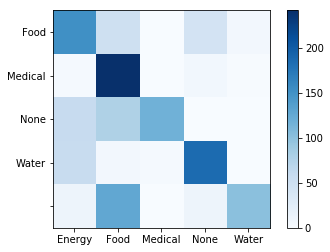

In [45]:
show_confusion_matrix(predictions)